<a href="https://colab.research.google.com/github/smasterparth/opencv/blob/master/PROJECT_Time_Series_SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
warnings.filterwarnings('ignore')

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [57]:
!pip install pmdarima

In [0]:
df = pd.read_csv('co2_mm_mlo.csv')

In [0]:
from pmdarima import auto_arima

In [60]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [0]:
df['date'] = pd.to_datetime({'year':df['year'] , 'month':df['month'] ,'day':1})

In [62]:
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [0]:
df.set_index('date' , inplace=True)

In [64]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [65]:
df.isnull().sum()

year            0
month           0
decimal_date    0
average         7
interpolated    0
dtype: int64

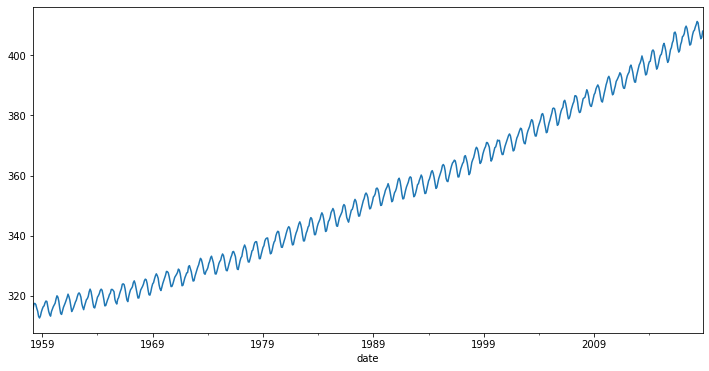

In [66]:
df['interpolated'].plot(figsize=(12,6))

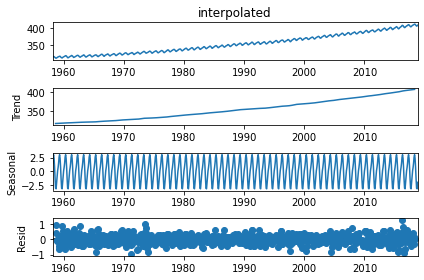

In [67]:
result = seasonal_decompose(df['interpolated'] , model='add')
result.plot();

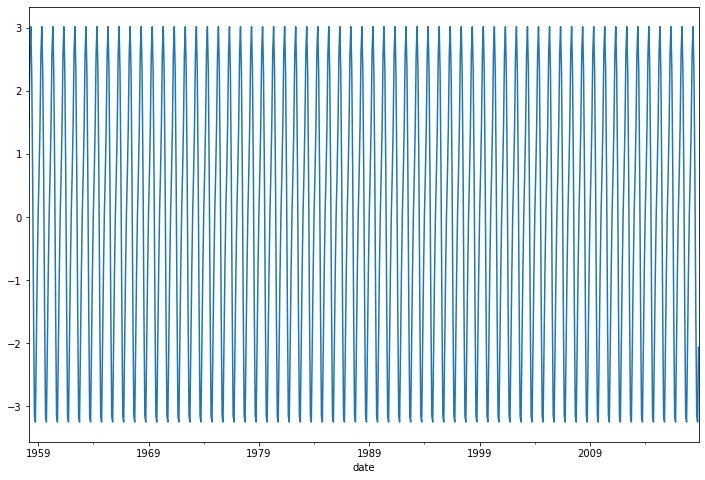

In [68]:
result.seasonal.plot(figsize=(12,8))

In [69]:
auto_arima(df['interpolated'] , seasonal=True, m = 12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -209.434
Date:                            Sun, 24 May 2020   AIC                            428.867
Time:                                    11:43:01   BIC                            451.819
Sample:                                         0   HQIC                           437.723
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.539e-05      0.000      0.211      0.833      -0.000       0.000
ma.L1         -0.3726      0.035    -10.723      0.000      -0.441      -0.304
ar.S.L12       0.9996      0.000   2875.523      0.000       0.999       1.000
ma.S.L12      -0.8658      0.022    -39.475      0.000      -0.909      -0.823
sigma2         0.0976      0.005     20.059      0.000       0.088       0.107
===================================================================================
Ljung-Box (Q):                       51.90   Jarque-Bera (JB):                 3.69
Prob(Q):                              0.10   Prob(JB):                         0.16
Heteroskedasticity (H):               1.12   Skew:                            -0.04
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
df.shape

(729, 5)

In [71]:
len(df)

729

In [0]:
train = df.iloc[:717]
test = df.iloc[717:]

In [0]:
model = SARIMAX(train['interpolated'] , order=(0,1,1) , seasonal_order=(1,0,1,12))

In [0]:
result = model.fit()

In [75]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -205.148
Date:                            Sun, 24 May 2020   AIC                            418.296
Time:                                    11:43:05   BIC                            436.591
Sample:                                03-01-1958   HQIC                           425.361
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3711      0.034    -10.878      0.000      -0.438      -0.304
ar.S.L12       0.9997      0.000   3239.402      0.000       0.999       1.000
ma.S.L12      -0.8649      0.023    -37.857      0.000      -0.910      -0.820
sigma2         0.0960      0.005     20.209      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       51.97   Jarque-Bera (JB):                 3.79
Prob(Q):                              0.10   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.02
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
start = len(train)
end = len(train) + len(test) - 1

In [0]:
predictions = result.predict(start=start , end=end, typ='levels').rename('SARIMAX Predictions')

In [78]:
test.head()

,year,month,decimal_date,average,interpolated
date,,,,,
2017-12-01,2017,12,2017.958,406.81,406.81
2018-01-01,2018,1,2018.042,407.96,407.96
2018-02-01,2018,2,2018.125,408.32,408.32
2018-03-01,2018,3,2018.208,409.41,409.41
2018-04-01,2018,4,2018.292,410.24,410.24


In [79]:
predictions.head()

2017-12-01    406.583566
2018-01-01    407.786026
2018-02-01    408.531335
2018-03-01    409.436791
2018-04-01    410.996071
Freq: MS, Name: SARIMAX Predictions, dtype: float64

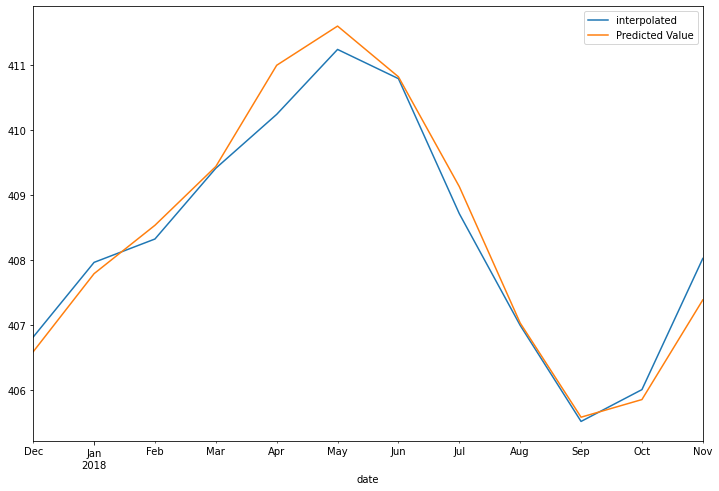

In [80]:
test['interpolated'].plot(legend=True, figsize=(12,8))
predictions.plot(legend=True, label='Predicted Value')

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
from statsmodels.tools.eval_measures import rmse

In [0]:
error = rmse(test['interpolated'] , predictions)

In [84]:
error

0.34623686626591743

# FORECAST

In [0]:
model_1 = SARIMAX(df['interpolated'] , order=(0,1,1) , seasonal_order=(1,0,1,12))

In [0]:
result_1 = model_1.fit()

In [87]:
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -209.449
Date:                            Sun, 24 May 2020   AIC                            426.899
Time:                                    11:43:08   BIC                            445.260
Sample:                                03-01-1958   HQIC                           433.984
                                     - 11-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3716      0.033    -11.209      0.000      -0.437      -0.307
ar.S.L12       0.9997      0.000   3094.829      0.000       0.999       1.000
ma.S.L12      -0.8644      0.022    -39.913      0.000      -0.907      -0.822
sigma2         0.0964      0.005     20.333      0.000       0.087       0.106
===================================================================================
Ljung-Box (Q):                       51.01   Jarque-Bera (JB):                 3.71
Prob(Q):                              0.11   Prob(JB):                         0.16
Heteroskedasticity (H):               1.12   Skew:                            -0.04
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
forecasted_val = result_1.predict(start=len(df) , end= len(df)+11 , typ='levels')

In [89]:
forecasted_val

2018-12-01    409.266614
2019-01-01    410.461568
2019-02-01    411.154311
2019-03-01    412.084376
2019-04-01    413.545014
2019-05-01    414.202039
2019-06-01    413.465529
2019-07-01    411.721854
2019-08-01    409.673225
2019-09-01    408.219504
2019-10-01    408.520801
2019-11-01    410.121043
Freq: MS, dtype: float64

In [90]:
df.index.min()

Timestamp('1958-03-01 00:00:00')

In [91]:
train.index.min() , train.index.max()

(Timestamp('1958-03-01 00:00:00'), Timestamp('2017-11-01 00:00:00'))

In [92]:
len(df)

729

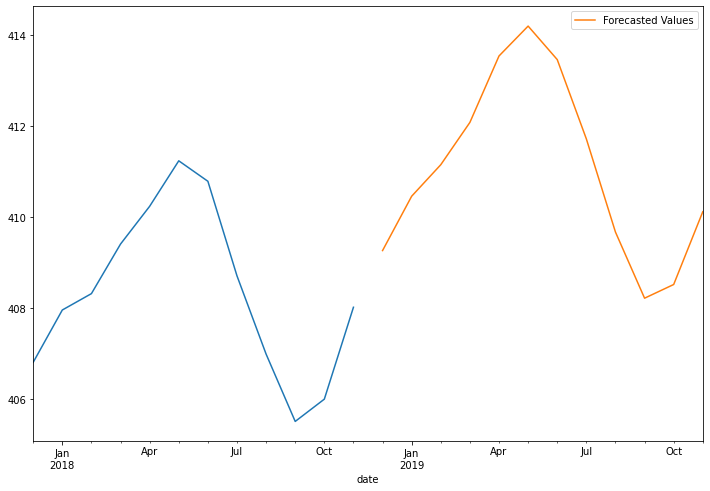

In [93]:
test['interpolated'].plot(figsize=(12,8))
forecasted_val.plot(legend=True, label='Forecasted Values')

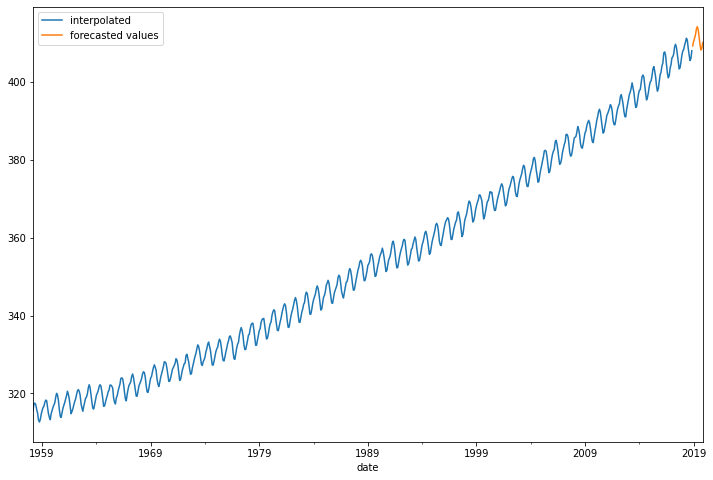

In [94]:
df['interpolated'].plot(legend=True, figsize=(12,8))
forecasted_val.plot(legend=True, label="forecasted values")

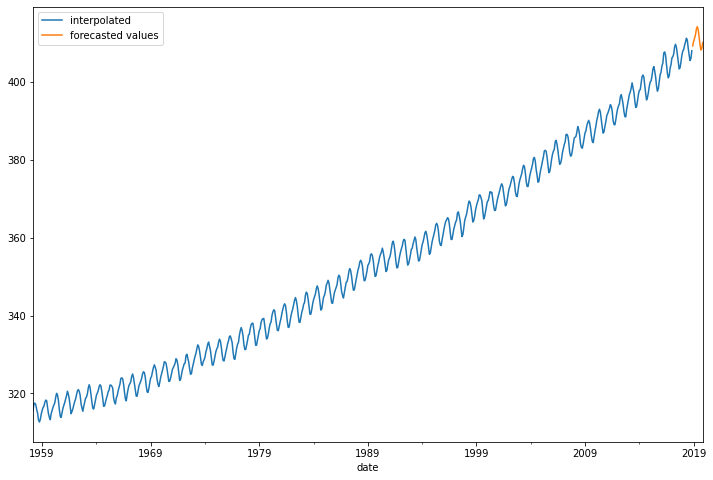

In [95]:
df['interpolated'].plot(legend=True, figsize=(12,8))
forecasted_val.plot(legend=True, label="forecasted values")

In [96]:
len(df)

729

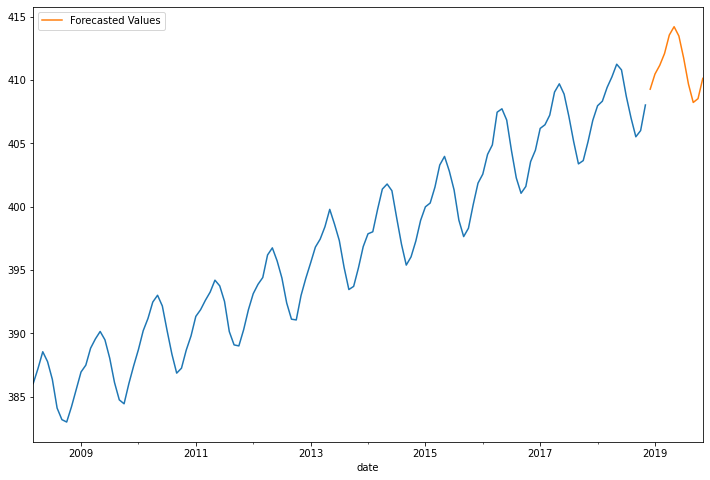

In [98]:
ax = df['interpolated'][600:].plot(figsize=(12,8))
forecasted_val.plot(legend=True, label='Forecasted Values' ,ax =ax);